<a href="https://colab.research.google.com/github/Suhanipatel83/Python-EDA-Melbourne-Housing-data/blob/main/Melbourne_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melbourne housing data analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.float_format",lambda x: "%.3f" %x)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Content/Melbourne_Housing.csv")

# Understanding the Housing Dataset

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


In [ ]:
data.shape

(27114, 16)

In [ ]:
data.info() #to check if all data types are valid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


# Changing data types

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

In [ ]:
data["BuildingArea"].unique() #to find any non-numeric data in the column if it exists

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [ ]:
data["BuildingArea"].apply(type).value_counts() #find values that need to be replaced with nan

<class 'float'>    16571
<class 'str'>      10543
Name: BuildingArea, dtype: int64

In [ ]:
data["BuildingArea"] = data["BuildingArea"].replace(["missing","inf"],np.nan)
data["BuildingArea"] = data["BuildingArea"].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

# Missing values

In [ ]:
data.isnull().sum() #to sum up total # of columns that are null

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [ ]:
data.duplicated().sum()

11

In [ ]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace =True)

In [ ]:
data.describe().T #statistical summary transposed

,count,mean,std,min,25%,50%,75%,max
Rooms,27103.000,2.992,0.955,1.000,2.000,3.000,4.000,16.000
Distance,27102.000,11.280,6.784,0.000,6.400,10.500,14.000,48.100
Postcode,27102.000,3113.787,111.129,3000.000,3046.000,3088.000,3153.000,3978.000
Bedroom,20678.000,3.046,0.955,0.000,2.000,3.000,4.000,20.000
Bathroom,20672.000,1.592,0.701,0.000,1.000,1.000,2.000,9.000
Car,20297.000,1.716,0.994,0.000,1.000,2.000,2.000,18.000
Landsize,17873.000,560.537,1411.309,50.000,220.000,513.000,664.000,76000.000
BuildingArea,10529.000,154.512,130.584,11.000,101.000,133.000,183.000,6791.000
YearBuilt,11985.000,1966.618,36.042,1850.000,1950.000,1970.000,2000.000,2019.000
Propertycount,27103.000,7564.741,4494.028,83.000,4294.000,6567.000,10412.000,21650.000


In [ ]:
cat_cols =["Suburb", "Type", "SellerG","Regionname"]
for column in cat_cols:
    print(data[column].value_counts())
    print("_"*50)

Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: Suburb, Length: 345, dtype: int64
__________________________________________________
h    18397
u     5886
t     2831
Name: Type, dtype: int64
__________________________________________________
Nelson           2733
Jellis           2517
Barry            2386
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: SellerG, Length: 347, dtype: int64
__________________________________________________
Southern Metropolitan         8484
Northern Metropolitan         7812
Western Metropolitan          5795
Eastern Metropolitan          3264
South-Eastern Metropolitan    1337
Northern Victoria              165
Eastern Victor

In [ ]:
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("_"*50)

Reservoir        0.027
Bentleigh East   0.018
Richmond         0.016
Preston          0.015
Brunswick        0.014
                  ... 
Wandin North     0.000
Ferny Creek      0.000
Tecoma           0.000
Montrose         0.000
viewbank         0.000
Name: Suburb, Length: 345, dtype: float64
__________________________________________________
h   0.679
u   0.217
t   0.104
Name: Type, dtype: float64
__________________________________________________
Nelson          0.101
Jellis          0.093
Barry           0.088
hockingstuart   0.077
Ray             0.058
                 ... 
Allan           0.000
Jim             0.000
iProperty       0.000
Batty           0.000
Icon            0.000
Name: SellerG, Length: 347, dtype: float64
__________________________________________________
Southern Metropolitan        0.313
Northern Metropolitan        0.288
Western Metropolitan         0.214
Eastern Metropolitan         0.120
South-Eastern Metropolitan   0.049
Northern Victoria            0.006


# Univariate analysis

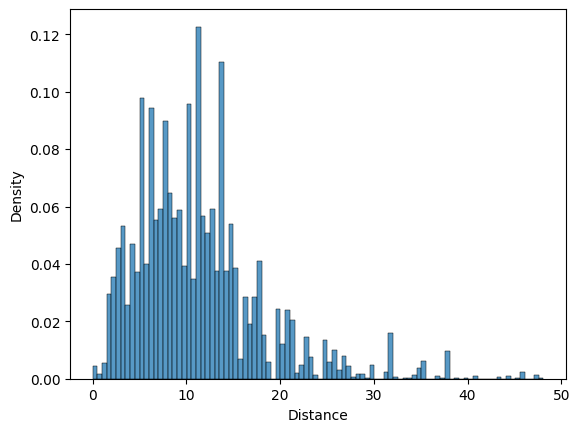

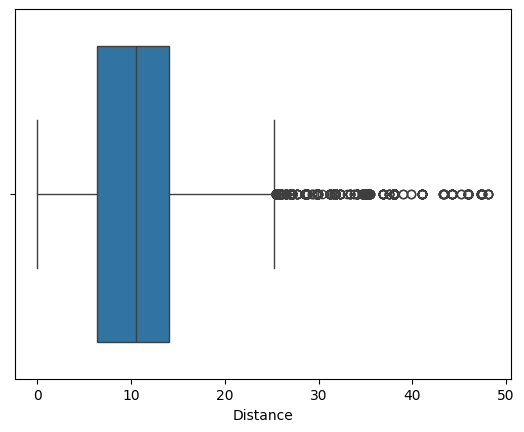

In [ ]:
sns.histplot(data= data, x = "Distance", stat="density")
plt.show()
sns.boxplot(data=data, x= "Distance")
plt.show()

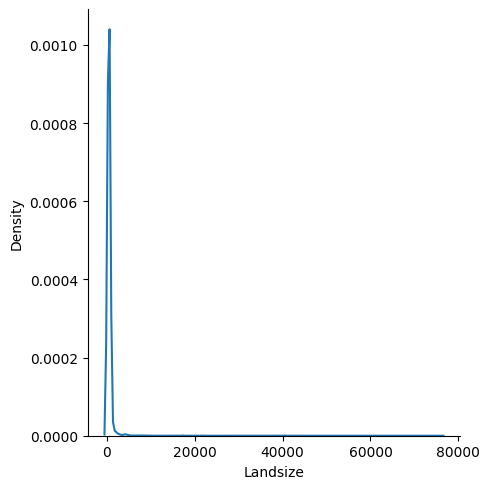

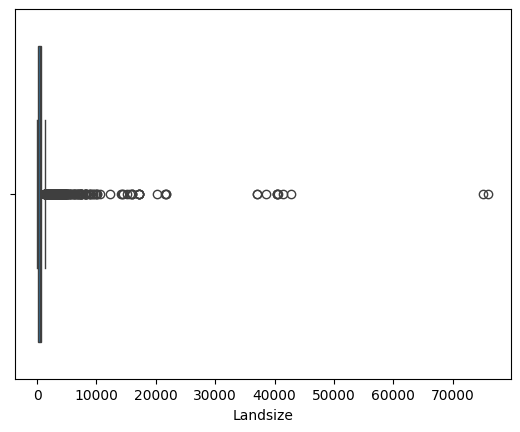

In [ ]:
sns.displot(data= data, x = "Landsize", kind="kde")
plt.show()
sns.boxplot(data=data, x= "Landsize")
plt.show()

In [ ]:
#2 outliers greater than 60000 sq meter landsize, so we should find out if these data points are valid
data.loc[data["Landsize"]>60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23908,Silvan,3,h,Harcourts,27-05-2017,34.600,3795.000,3.000,2.000,2.000,76000.000,NaN,NaN,Eastern Victoria,457,1085000
25090,Balwyn North,3,h,Kay,28-08-2016,9.200,3104.000,3.000,1.000,2.000,75100.000,NaN,NaN,Southern Metropolitan,7809,2000000


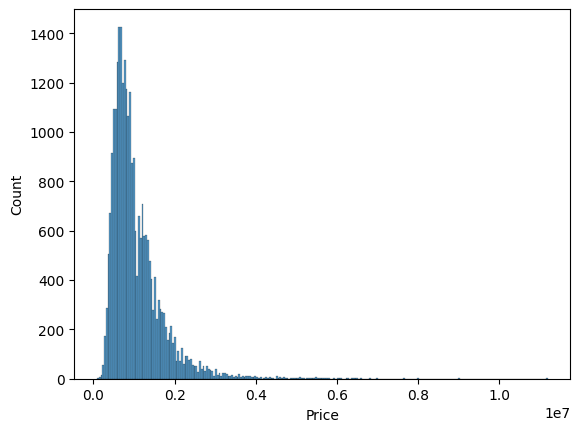

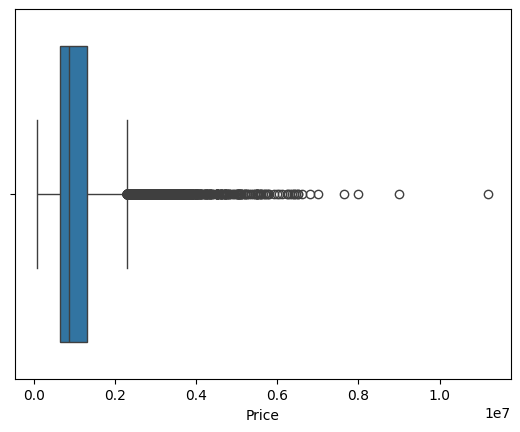

In [ ]:
sns.histplot(data=data, x="Price")
plt.show()
sns.boxplot(data = data, x="Price")
plt.show()

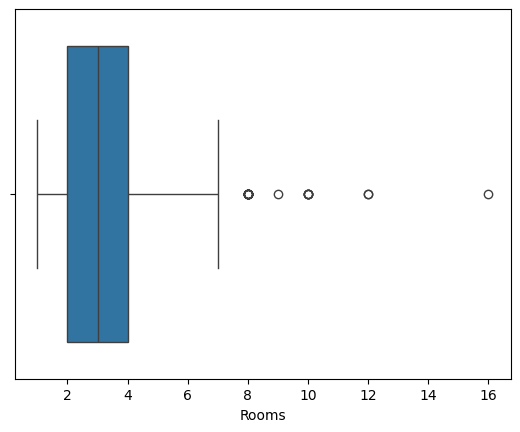

In [ ]:
sns.boxplot(data=data, x= "Rooms")
plt.show()

In [ ]:
data.loc[data["Rooms"] > 7].shape

(23, 16)

In [ ]:
data.loc[data["Rooms"]>7,"Type"].value_counts()

h    21
u     2
Name: Type, dtype: int64

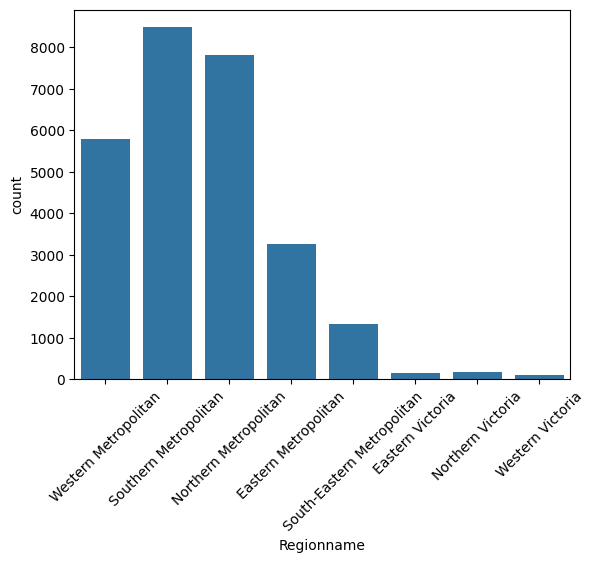

In [ ]:
sns.countplot(data=data,x="Regionname")
plt.xticks(rotation =45)
plt.show()

# Bivariate analysis

In [ ]:
data.corr()

<ipython-input-4-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Propertycount,Price
Rooms,1.000,0.284,0.081,0.959,0.609,0.394,0.071,-0.004,-0.080,0.465
Distance,0.284,1.000,0.490,0.283,0.140,0.245,0.118,0.321,-0.021,-0.211
Postcode,0.081,0.490,1.000,0.087,0.124,0.063,0.076,0.100,0.024,0.045
Bedroom,0.959,0.283,0.087,1.000,0.606,0.396,0.071,0.006,-0.060,0.430
Bathroom,0.609,0.140,0.124,0.606,1.000,0.306,0.055,0.187,-0.040,0.431
Car,0.394,0.245,0.063,0.396,0.306,1.000,0.092,0.133,-0.014,0.201
Landsize,0.071,0.118,0.076,0.071,0.055,0.092,1.000,0.045,-0.020,0.043
YearBuilt,-0.004,0.321,0.100,0.006,0.187,0.133,0.045,1.000,0.027,-0.340
Propertycount,-0.080,-0.021,0.024,-0.060,-0.040,-0.014,-0.020,0.027,1.000,-0.059
Price,0.465,-0.211,0.045,0.430,0.431,0.201,0.043,-0.340,-0.059,1.000


<ipython-input-21-2c02c5961def>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot =True, cmap ="Spectral", vmin=-1, vmax =1)


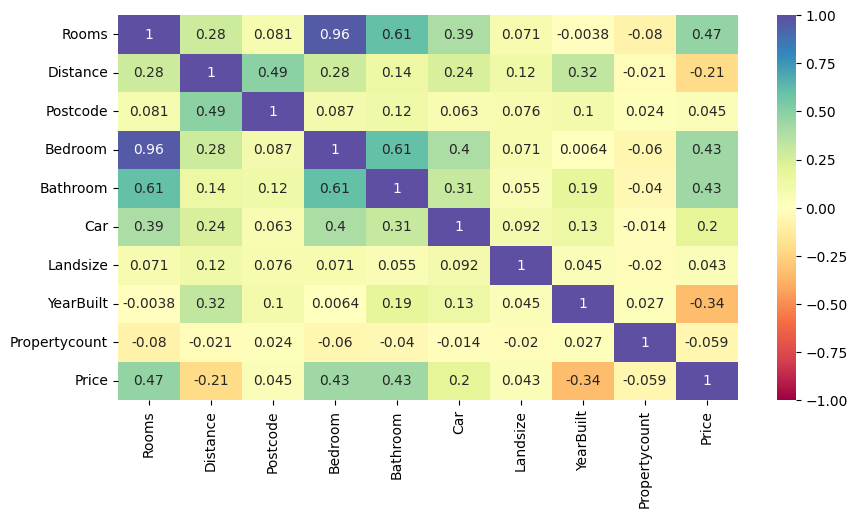

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot =True, cmap ="Spectral", vmin=-1, vmax =1)
plt.show()

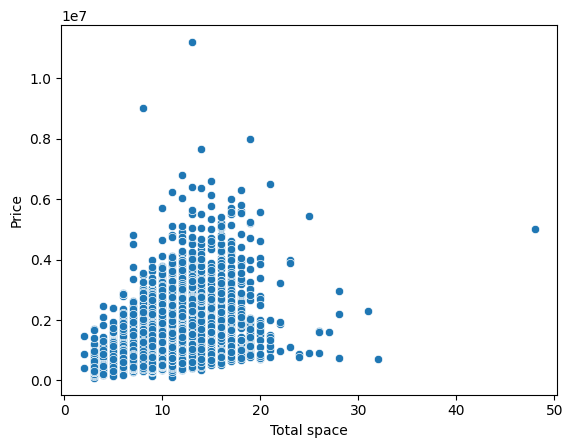

In [ ]:
#Create column that sums columns related to home size and then plot against Price
data["Total space"] = data["Rooms"]+data["Bedroom"]+data["Bathroom"]+data["Car"]
sns.scatterplot(data=data, x="Total space", y="Price")
plt.show()

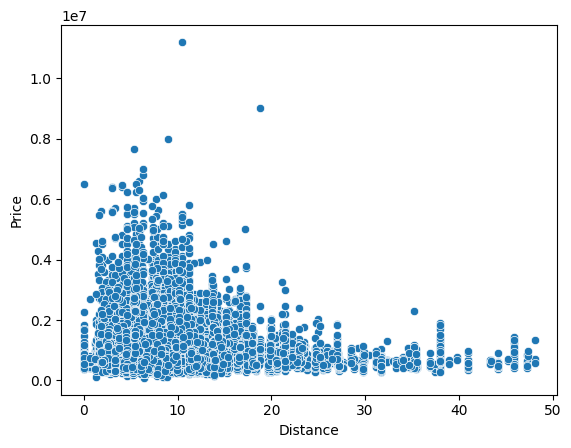

<ipython-input-23-0b5fdfca1426>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="Distance", y="Price", ci =None)


<Axes: xlabel='Distance', ylabel='Price'>

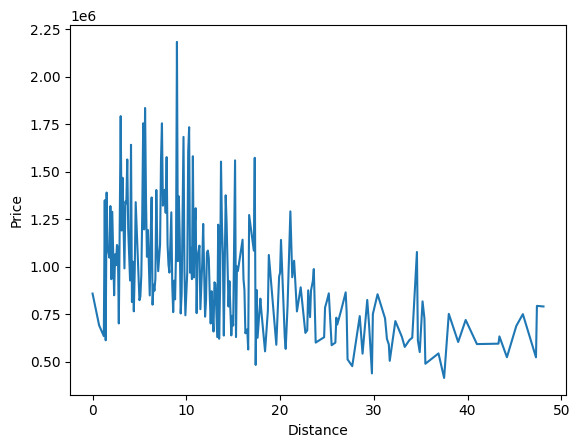

In [ ]:
sns.scatterplot(data=data, x="Distance",y="Price")
plt.show()
sns.lineplot(data=data, x="Distance", y="Price", ci =None)

In [ ]:
#discretize Distance to visualize better
data["Distance_bins"] =pd.cut(
    data["Distance"],
    bins =[0,15,30,50],
    labels=["Nearby","Moderately Close","Far"],
    right=False,
)
data["Distance_bins"].value_counts()

Nearby              21677
Moderately Close     4775
Far                   661
Name: Distance_bins, dtype: int64

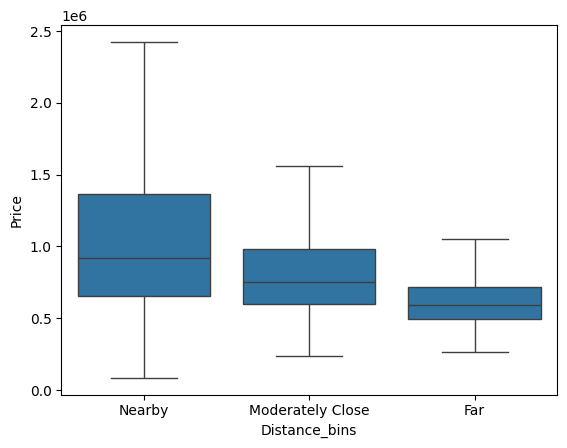

In [ ]:
sns.boxplot(data=data, x="Distance_bins", y="Price",showfliers =False) #removing outliers for better comparison
plt.show()

In [ ]:
yearsold=data["Date"].dt.year
data["AgeofProp"]= yearsold - data["YearBuilt"]
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total space,Distance_bins,AgeofProp
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000,9.000,Nearby,0.000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000,5.000,Nearby,116.000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000,5.000,Nearby,NaN
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000,13.000,Nearby,86.000
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000,10.000,Nearby,3.000


In [ ]:
data[["AgeofProp","Price"]].corr()

,AgeofProp,Price
AgeofProp,1.000,0.341
Price,0.341,1.000


<ipython-input-41-ae691e240c5b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="AgeofProp", y= "Price", ci=None)


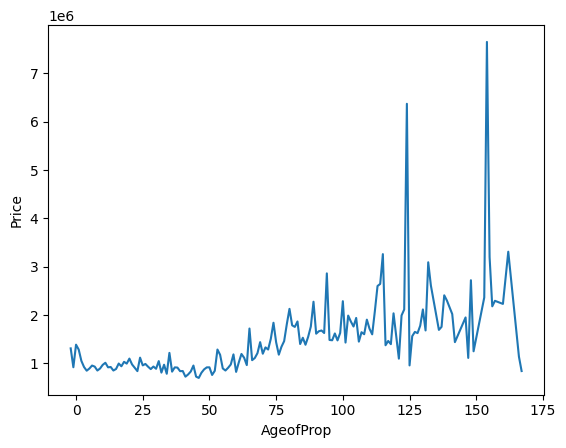

In [ ]:
sns.lineplot(data=data, x="AgeofProp", y= "Price", ci=None)
plt.show()

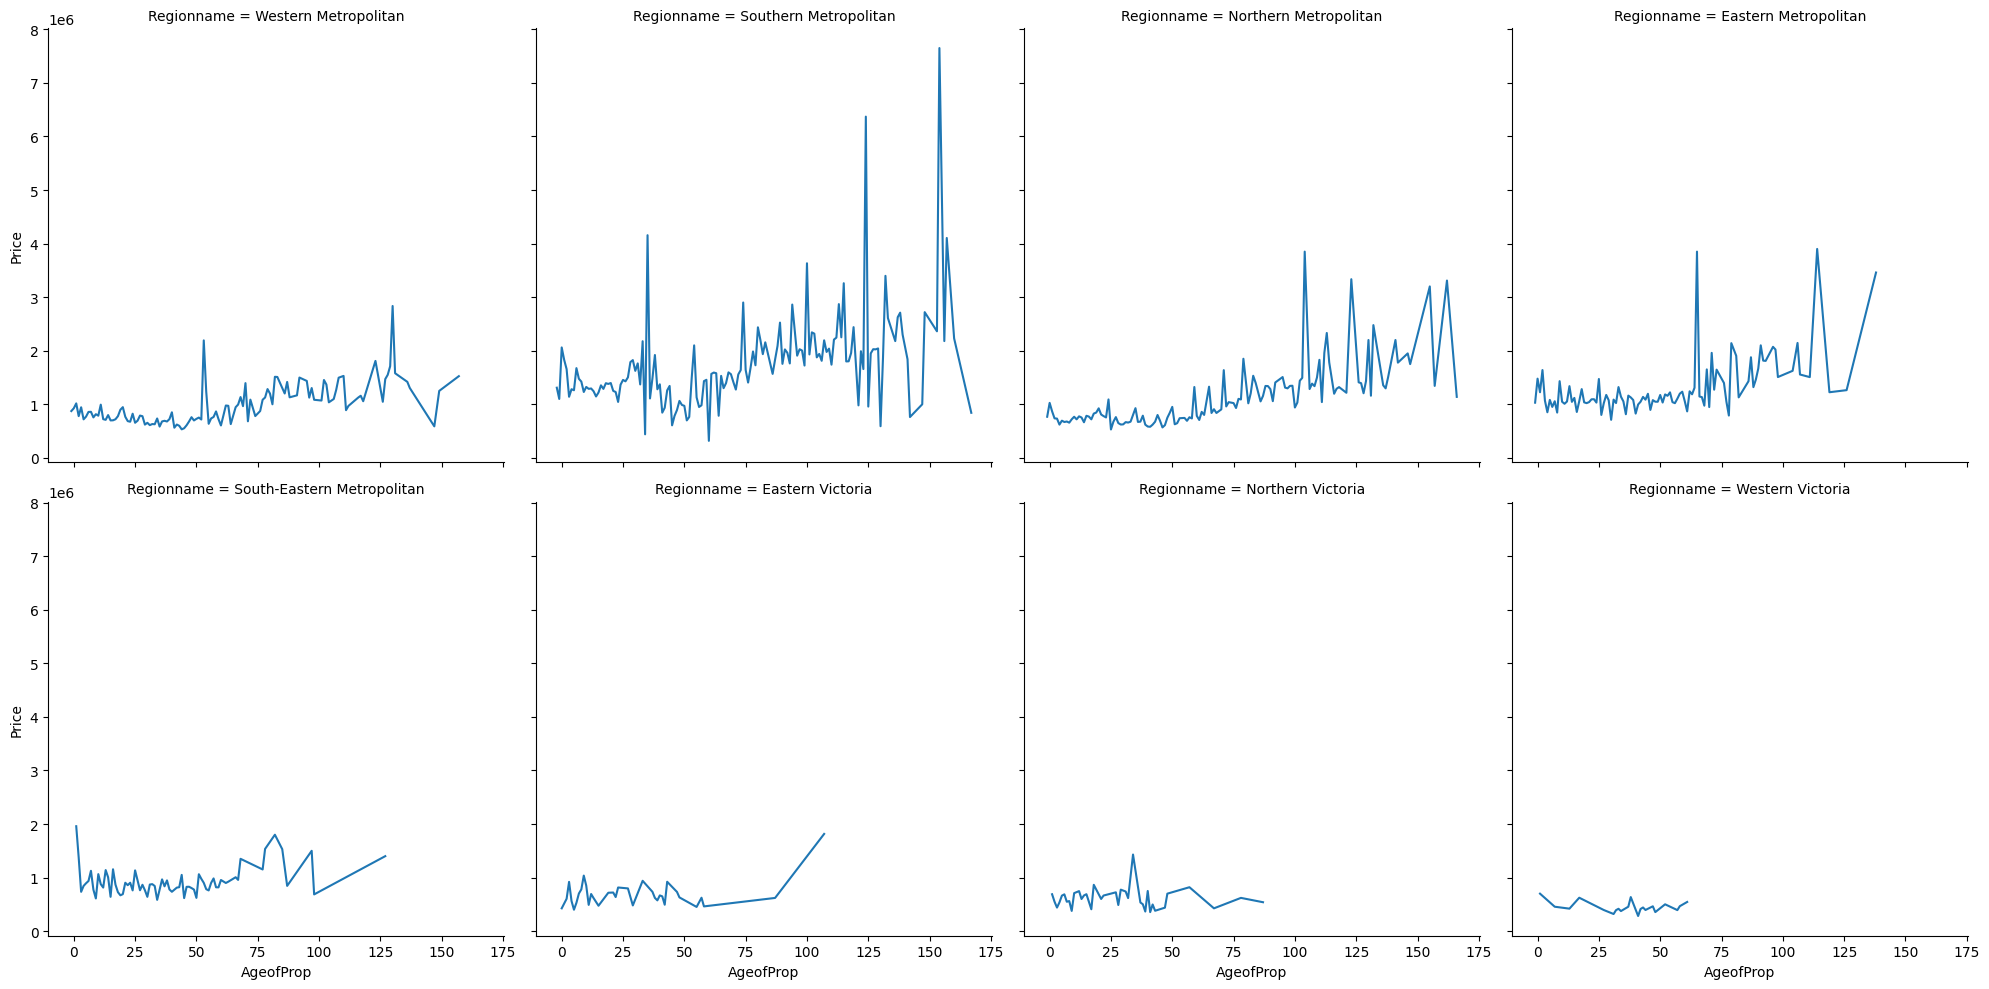

In [ ]:
sns.relplot(
    data=data,
    x="AgeofProp",
    y="Price",
    col="Regionname",
    kind ="line",
    errorbar=None,
    col_wrap=4,
    )
plt.show()

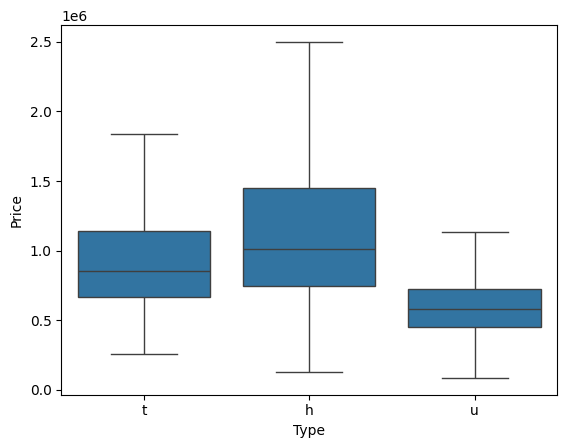

In [ ]:
sns.boxplot(data=data, x="Type", y= "Price", showfliers =False)
plt.show()

# Treating missing values

In [ ]:
pd.DataFrame(
    {
        "Count":data.isnull().sum()[data.isnull().sum()>0],
        "Percentage":(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100,
    }
)

,Count,Percentage
Distance,1,0.004
Postcode,1,0.004
Bedroom,6436,23.737
Bathroom,6442,23.759
Car,6817,25.142
Landsize,9241,34.082
BuildingArea,16571,61.116
YearBuilt,15129,55.798
Total space,6817,25.142


In [ ]:
#Row with Distance  =null also shows other columns that are null. This is an example of bad data
data.loc[data["Distance"].isnull() == True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total space
9594,Fawkner Lot,3,h,Brad,06-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN


In [ ]:
data=data.drop(9594).reset_index(drop=True)

In [ ]:
pd.DataFrame(
    {
        "Count":data.isnull().sum()[data.isnull().sum()>0],
        "Percentage":(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100,
    }
)

,Count,Percentage
Bedroom,6435,23.734
Bathroom,6441,23.756
Car,6816,25.139
Landsize,9240,34.080
BuildingArea,16570,61.115
YearBuilt,15128,55.796
Total space,6816,25.139


In [ ]:
#to compare how many instances of other data columns are missing
data.loc[data["Bedroom"].isnull() == True,"Bathroom"].value_counts(dropna=False)


NaN    6435
Name: Bathroom, dtype: int64

In [ ]:
#to check if missing Bedroom values are from any specific regions
data.loc[data["Bedroom"].isnull() == True,"Regionname"].value_counts(dropna=False)

Southern Metropolitan         2201
Northern Metropolitan         1915
Western Metropolitan          1215
Eastern Metropolitan           728
South-Eastern Metropolitan     318
Eastern Victoria                26
Northern Victoria               25
Western Victoria                 7
Name: Regionname, dtype: int64

In [ ]:
#check average number of bedrooms, bathrooms and car parking by region to determine appropriate values to fill in missing cells
data.groupby(["Regionname","Type"])[["Bedroom","Bathroom","Car"]].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

In [ ]:
#input missing values in bedroom column
data["Bedroom"] =data["Bedroom"].fillna(value=data.groupby(["Regionname","Type"])["Bedroom"].transform("mean"))

In [ ]:
data["Bathroom"] =data["Bathroom"].fillna(value=data.groupby(["Regionname","Type"])["Bathroom"].transform("mean"))
data["Car"] =data["Car"].fillna(value=data.groupby(["Regionname","Type"])["Car"].transform("mean"))

In [ ]:
data["Bedroom"] =data["Bedroom"].astype(int)
data["Bathroom"] =data["Bathroom"].astype(int)
data["Car"] =data["Car"].astype(int)

In [ ]:
#Landsize is highly skewed distribution so using mean to repalce missing values is not a good idea. Median is better choice in this instance

data.groupby(["Regionname","Type"])[["Landsize"]].median()

Landsize
Regionname                 Type          
Eastern Metropolitan       h      693.500
                           t      236.000
                           u      208.000
Eastern Victoria           h      840.000
                           u      230.000
Northern Metropolitan      h      482.000
                           t      145.000
                           u       50.000
Northern Victoria          h      737.500
                           u      315.000
South-Eastern Metropolitan h      632.000
                           t      248.000
                           u      210.000
Southern Metropolitan      h      593.000
                           t      267.000
                           u       50.000
Western Metropolitan       h      537.000
                           t      200.000
                           u       80.000
Western Victoria           h      603.000

In [ ]:
data["Landsize"] =data["Landsize"].fillna(value=data.groupby(["Regionname","Type"])["Landsize"].transform("median"))

In [ ]:
#Table below shows that successfully addressed most missing values
pd.DataFrame(
    {
        "Count":data.isnull().sum()[data.isnull().sum()>0],
        "Percentage":(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100,
    }
)

,Count,Percentage
BuildingArea,16570,61.115
YearBuilt,15128,55.796
Total space,6816,25.139


In [ ]:
#For rest of the missing values, we will remvoe the data columns from the data set since they are not needed for further analysis
data=data.drop(columns=["BuildingArea","YearBuilt"])

In [ ]:
data.drop("Total space", axis=1, inplace =True)

In [ ]:
data.to_csv("/content/drive/MyDrive/Content/Melbourne_Housing_NoMissing.csv",index=False)

# Outlier analysis

In [ ]:
data =pd.read_csv("/content/drive/MyDrive/Content/Melbourne_Housing_NoMissing.csv")
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3,2,1,303.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2,1,0,120.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2,1,0,159.000,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3,2,4,853.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3,2,2,208.000,Northern Metropolitan,2211,1110000


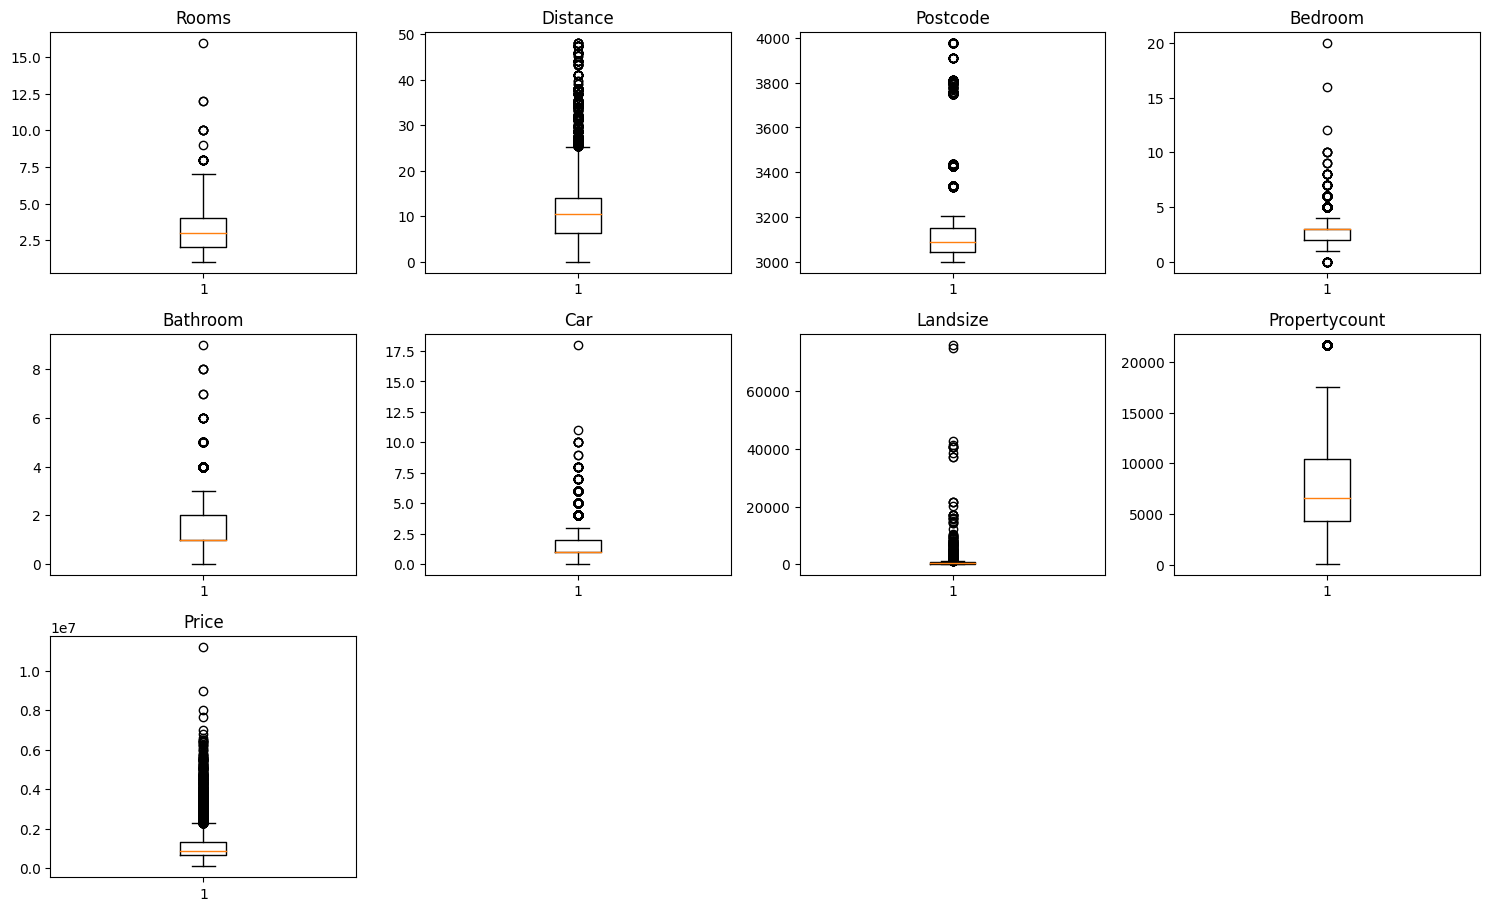

In [ ]:
numeric_columns=["Rooms","Distance","Postcode","Bedroom","Bathroom","Car","Landsize","Propertycount","Price"]
plt.figure(figsize=(15,12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(4,4,i+1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [ ]:
#calculate whisker values to check if replacing outliers with min and max whiskers makes sense
Q1=data[numeric_columns].quantile(0.25)
Q3=data[numeric_columns].quantile(0.75)
IQR = Q3-Q1 #inter quantile range
lower_whisker = Q1 -1.5*IQR
upper_whisker = Q3+1.5*IQR

In [ ]:
lower_whisker

Rooms                -1.000
Distance             -5.000
Postcode           2885.500
Bedroom               0.500
Bathroom             -0.500
Car                  -0.500
Landsize           -469.500
Propertycount     -4883.000
Price           -362500.000
dtype: float64

In [ ]:
upper_whisker

Rooms                 7.000
Distance             25.400
Postcode           3313.500
Bedroom               4.500
Bathroom              3.500
Car                   3.500
Landsize           1286.500
Propertycount     19589.000
Price           2297500.000
dtype: float64

In [ ]:
((data[numeric_columns]<lower_whisker) | (data[numeric_columns]>upper_whisker)).sum()/data.shape[0] *100

Rooms           0.085
Distance        4.341
Postcode        2.910
Bedroom         4.194
Bathroom        0.870
Car             4.304
Landsize        1.741
Propertycount   2.670
Price           4.658
dtype: float64

In [ ]:
#Defining a function to remove outliers from column
def treat_outliers(df,col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR = Q3-Q1 #inter quantile range
  lower_whisker = Q1 -1.5*IQR
  upper_whisker = Q3+1.5*IQR
  df[col] = np.clip(df[col],lower_whisker, upper_whisker)

  return df

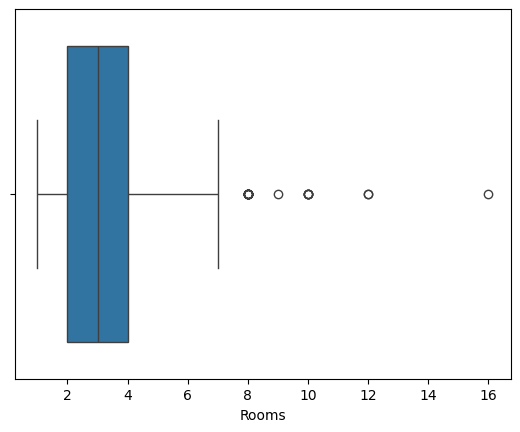

In [ ]:
#Boxplot with outliers
sns.boxplot(data=data,x="Rooms")
plt.show()

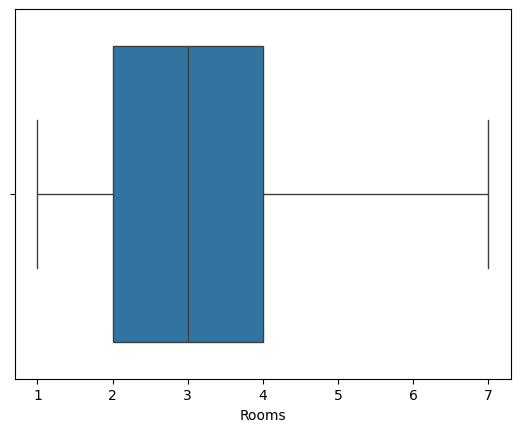

In [ ]:
#Boxplot without outliers
data=treat_outliers(data,"Rooms")
data["Rooms"]

sns.boxplot(data=data,x="Rooms")
plt.show()

In [ ]:
data=treat_outliers(data,"Bedroom")
data=treat_outliers(data,"Car")
data=treat_outliers(data,"Bathroom")
data=treat_outliers(data,"Landsize")

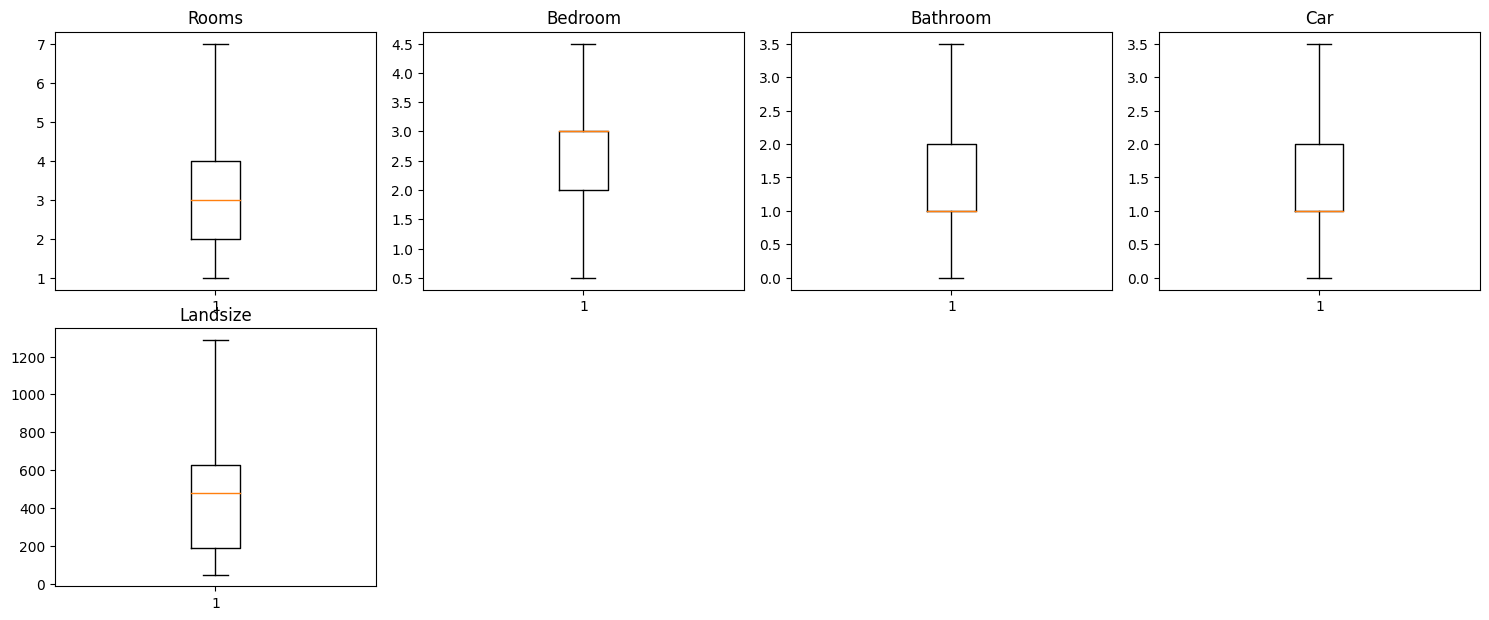

In [ ]:
numeric_columns=["Rooms","Bedroom","Bathroom","Car","Landsize"]
plt.figure(figsize=(15,12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(4,4,i+1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()